## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Na koniec należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

fileName = 'jet.bmp'
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

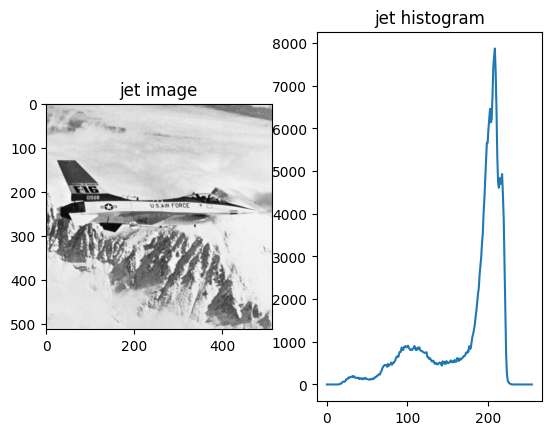

In [ ]:
im_jet = cv2.imread('jet.bmp', cv2.COLOR_BGR2GRAY)
hist_jet = cv2.calcHist([im_jet], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2)
axs[0].imshow(im_jet, cmap='gray')
axs[0].set_title('jet image')
axs[1].plot(hist_jet)
axs[1].set_title('jet histogram')
plt.show()

In [ ]:
mean_brightness = np.mean(im_jet)
lm = int(mean_brightness)
print(f'lm = {lm}')

lm = 178


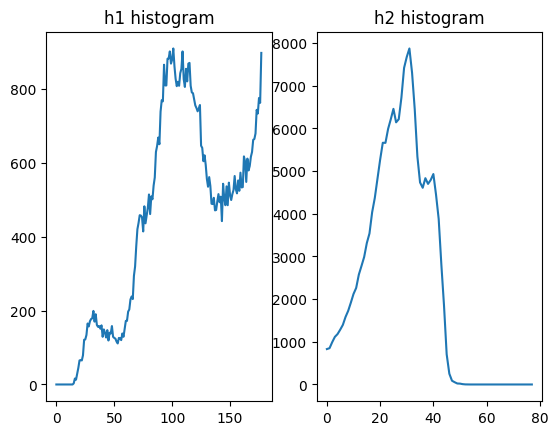

In [ ]:
h1 = hist_jet[:lm]
h2 = hist_jet[lm:]
fig, axs = plt.subplots(1, 2)
axs[0].plot(h1)
axs[0].set_title('h1 histogram')
axs[1].plot(h2)
axs[1].set_title('h2 histogram')
plt.show()

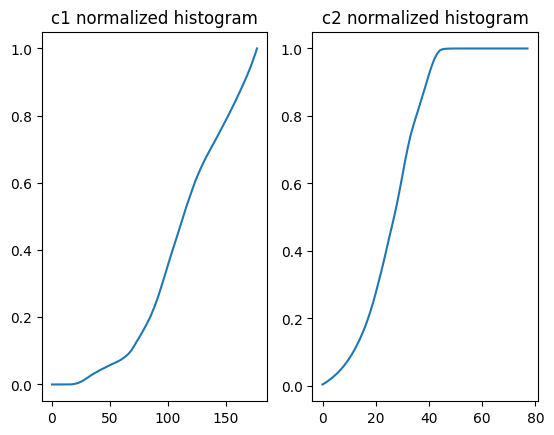

In [ ]:
c1, c2 = h1.cumsum(), h2.cumsum()
c1_normalized, c2_normalized = c1 / c1.max(), c2 / c2.max()

fig, axs = plt.subplots(1, 2)
axs[0].plot(c1_normalized)
axs[0].set_title('c1 normalized histogram')
axs[1].plot(c2_normalized)
axs[1].set_title('c2 normalized histogram')
plt.show()

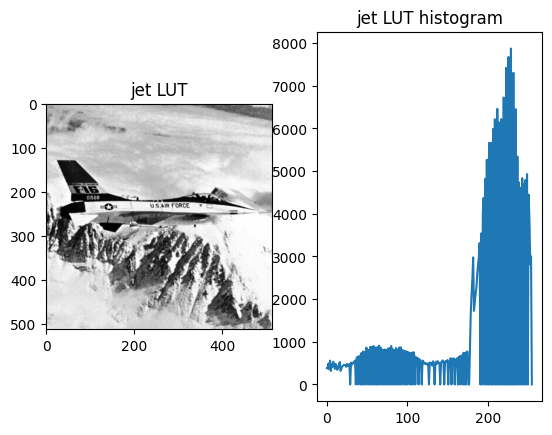

In [ ]:
# LUT transformation
c1_n = (lm) * c1_normalized;
c2_n = lm + 1 + (255 - lm - 1) * c2_normalized;

# concatenate
jet_LUT = np.concatenate((c1_n, c2_n))
jet_bbhe_operation = cv2.LUT(im_jet, jet_LUT)
hist_jet_bbhe = cv2.calcHist([jet_bbhe_operation], [0], None, [256], [0, 256])

fix, axs = plt.subplots(1, 2)
axs[0].imshow(jet_bbhe_operation, cmap='gray')
axs[0].set_title('jet LUT')
axs[1].plot(hist_jet_bbhe)
axs[1].set_title('jet LUT histogram')
plt.show()

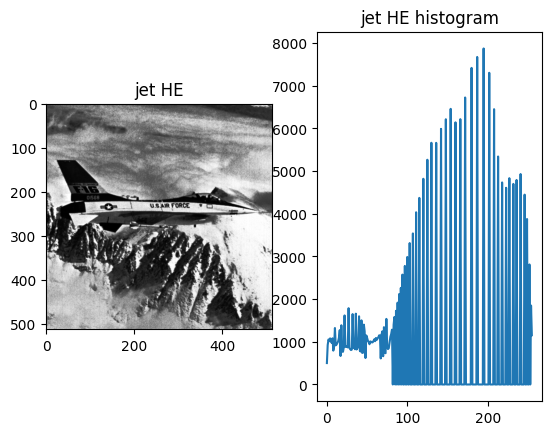

In [ ]:
# comparison of the results of the BBHE operation with classical HE
jet_he_operation = cv2.equalizeHist(im_jet)
hist_jet_he = cv2.calcHist([jet_he_operation], [0], None, [256], [0, 256])

fix, axs = plt.subplots(1, 2)
axs[0].imshow(jet_he_operation, cmap='gray')
axs[0].set_title('jet HE')
axs[1].plot(hist_jet_he)
axs[1].set_title('jet HE histogram')
plt.show()

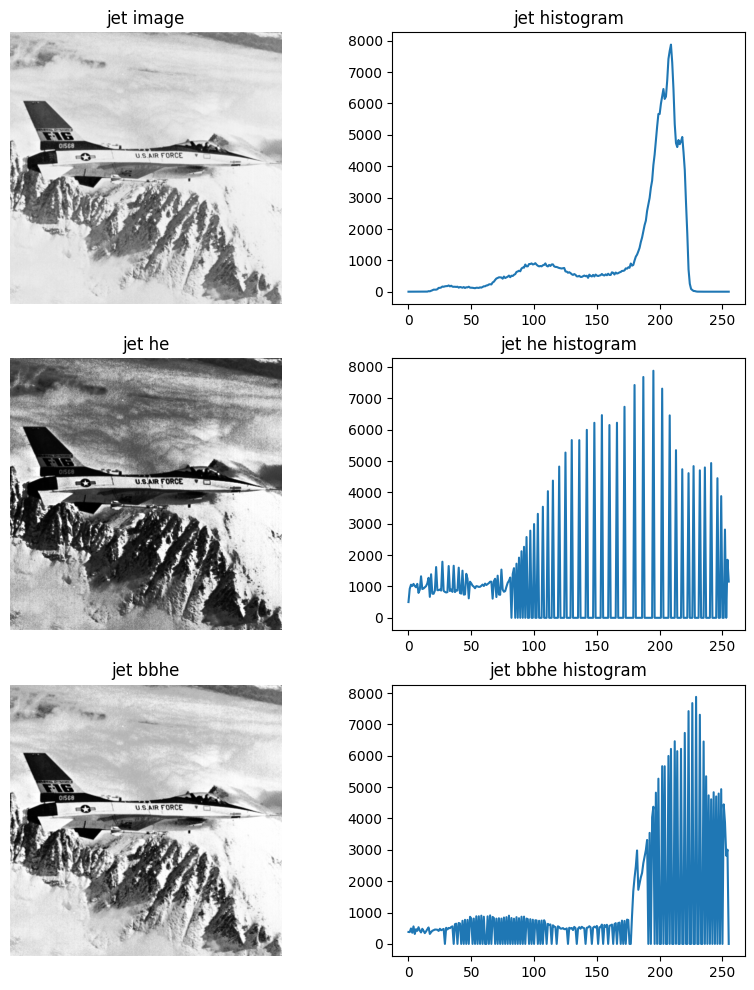

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

images_and_histograms = [
    (im_jet, hist_jet, 'jet image', 'jet histogram'),
    (jet_he_operation, hist_jet_he, 'jet he', 'jet he histogram'),
    (jet_bbhe_operation, hist_jet_bbhe, 'jet bbhe', 'jet bbhe histogram')
]

for i, (image, hist, title_img, title_hist) in enumerate(images_and_histograms):
    axs[i, 0].imshow(image, cmap='gray')
    axs[i, 0].set_title(title_img)
    axs[i, 0].axis('off')
    axs[i, 1].plot(hist)
    axs[i, 1].set_title(title_hist)

plt.show()